# Mount Data dari Google Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libary Awal Yang Dibutuhkan

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

# Buka Data

In [24]:
#Buka seluruh data untuk training dan validasi
dataframe_2013 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2013_final3.csv", sep=";")
dataframe_2014 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2014_final3.csv", sep=";")
dataframe_2015 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2015_final3.csv", sep=";")
dataframe_2016 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2016_final3.csv", sep=";")
dataframe_2017 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2017_final3.csv", sep=";")
dataframe_2018 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2018_final3.csv", sep=";")

#Buka data tahun 2019 sebagai data testing
dataframe_2019 = pd.read_csv("/content/drive/MyDrive/DemoDay/Dataset/dkikepadatankelurahan2019_final3.csv", sep=";")

#Gabungkan seluruh dataframe
dataframe = pd.concat([dataframe_2013, dataframe_2014, dataframe_2015, dataframe_2016, dataframe_2017, dataframe_2018],ignore_index=True)

# Setup Data

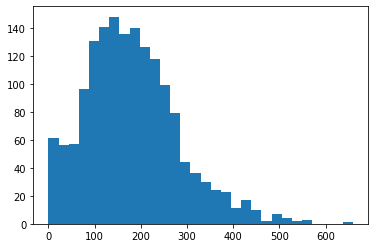

In [25]:
#cek persebaran data kematian menggunakan histogram
jumlah_kematian = np.array(dataframe['JUMLAH KEMATIAN'])
import matplotlib.pyplot as plt
_ = plt.hist(jumlah_kematian, bins='auto')

Dari histogram di atas, dapat di ambil cut off sekitar 150. Dimana artinya jika JUMLAH KEMATIAN < 150, maka akan masuk ke kelas 0. Sisanya akan masuk ke kelas 1.

In [26]:
#mengatur jumlah kematian yang di bawah 150 adalah label 0, dan di atas 150 adalah label 1
label = dataframe['JUMLAH KEMATIAN'] < 150
label_01 = label.apply(lambda x: 1 if x else 0)
dataframe['label'] = label_01

#menghapus kolom-kolom data yang tidak digunakan
dataframe = dataframe.drop(['JUMLAH KEMATIAN'], axis=1)
dataframe=dataframe.drop(['TAHUN'],axis=1)
dataframe=dataframe.drop(['NAMA PROVINSI'],axis=1)
dataframe=dataframe.drop(['NAMA KABUPATEN/KOTA'],axis=1)
dataframe=dataframe.drop(['NAMA KECAMATAN'],axis=1)
dataframe=dataframe.drop(['NAMA KELURAHAN'],axis=1)

In [27]:
#cek 5 data pertama
dataframe.head()

,JUMLAH KK,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),15-19 Laki-Laki,15-19 Perempuan,20-24 Laki-Laki,20-24 Perempuan,25-29 Laki-Laki,25-29 Perempuan,30-34 Laki-Laki,...,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,>65 Laki-Laki,>65 Perempuan,JUMLAH RT,JUMLAH RW,JUMLAH KELAHIRAN,label
0,9302,5.77,4981,1379,1219,2598,1111,1023,2134,1178,...,1248,2690,1286,1048,4007,3630,66,7,378,1
1,11025,0.80,43826,1528,1440,2968,1380,1229,2609,1387,...,1460,3111,1505,1371,5025,4716,139,11,441,1
2,8854,1.67,18012,1183,1111,1194,1179,1364,1269,1550,...,677,609,418,381,416,417,53,5,417,1
3,3856,0.67,17304,474,404,419,430,459,414,514,...,333,347,247,228,322,389,74,6,111,1
4,7923,3.17,8400,1121,1028,1131,1073,1122,1141,1314,...,596,476,377,250,347,359,65,5,395,1


In [28]:
#statistik data
dataframe.describe()

,JUMLAH KK,LUAS WILAYAH (KM2),KEPADATAN (JIWA/KM2),15-19 Laki-Laki,15-19 Perempuan,20-24 Laki-Laki,20-24 Perempuan,25-29 Laki-Laki,25-29 Perempuan,30-34 Laki-Laki,...,55-59 Laki-Laki,55-59 Perempuan,60-64 Laki-Laki,60-64 Perempuan,>65 Laki-Laki,>65 Perempuan,JUMLAH RT,JUMLAH RW,JUMLAH KELAHIRAN,label
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,...,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,12275.988140,2.471493,23299.981273,1440.598002,1383.159800,1541.311486,1406.730961,1507.578652,1623.976904,1782.927591,...,909.058052,1033.355805,663.734082,644.288390,1066.165418,1088.782147,114.797129,10.240949,541.750936,0.415106
std,7168.590751,2.077043,21311.336427,888.772316,863.085125,1145.260344,872.322083,956.546112,1134.404472,1149.840522,...,593.560178,1068.552719,503.585813,468.984862,1529.516682,1354.009679,51.765948,4.088572,352.507504,0.492894
min,589.000000,0.262000,624.000000,12.000000,18.000000,22.000000,15.000000,14.000000,11.000000,18.000000,...,15.000000,12.000000,13.000000,13.000000,30.000000,32.000000,9.000000,2.000000,20.000000,0.000000
25%,7721.750000,0.978000,12104.000000,870.000000,824.500000,877.500000,861.250000,904.000000,935.000000,1046.000000,...,569.000000,551.250000,388.250000,376.250000,495.250000,527.000000,79.000000,7.000000,307.000000,0.000000
50%,11575.500000,1.800000,17650.000000,1342.000000,1265.000000,1352.500000,1293.000000,1363.000000,1433.000000,1604.500000,...,833.000000,830.000000,562.000000,557.000000,745.500000,816.000000,110.000000,10.000000,479.000000,0.000000
75%,15274.500000,3.300000,29706.000000,1826.000000,1746.750000,1883.000000,1764.750000,1900.250000,2020.000000,2280.000000,...,1099.000000,1128.500000,781.750000,783.750000,1062.000000,1145.750000,145.000000,13.000000,694.500000,1.000000
max,52628.000000,13.070000,307643.000000,6875.000000,6339.000000,13214.000000,6528.000000,7063.000000,11671.000000,8544.000000,...,6846.000000,14326.000000,6333.000000,5476.000000,20243.000000,17517.000000,280.000000,27.000000,2491.000000,1.000000


In [29]:
#80% data untuk training, 20% data untuk validasi
dataframe_validasi = dataframe.sample(frac=0.2, random_state=97)
dataframe_training = dataframe.drop(dataframe_validasi.index)

print("Training sample: {0}, Validasi sample: {1}".format(len(dataframe_training), len(dataframe_validasi)))

Training sample: 1282, Validasi sample: 320


# Bentuk Dataset

In [30]:
#membuat dataset tensorflow dari dataframe
def dataframe_ke_dataset(dataframe):
    dataframe = dataframe.copy()

    #ambil dan hilangkan kolom label dari data training dan validasi
    labels = dataframe.pop("label")

    #bentuk dataset tensorflow
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    
    #acak dataset
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

#bentuk dataset untuk training dan validasi
dataset_training = dataframe_ke_dataset(dataframe_training)
dataset_validasi = dataframe_ke_dataset(dataframe_validasi)

In [31]:
for x, y in dataset_training.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'JUMLAH KK': <tf.Tensor: shape=(), dtype=int64, numpy=20542>, 'LUAS WILAYAH (KM2)': <tf.Tensor: shape=(), dtype=float64, numpy=2.6783>, 'KEPADATAN (JIWA/KM2)': <tf.Tensor: shape=(), dtype=int64, numpy=24634>, '15-19 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=2512>, '15-19 Perempuan': <tf.Tensor: shape=(), dtype=int64, numpy=2444>, '20-24 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=2325>, '20-24 Perempuan': <tf.Tensor: shape=(), dtype=int64, numpy=2328>, '25-29 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=2512>, '25-29 Perempuan': <tf.Tensor: shape=(), dtype=int64, numpy=2590>, '30-34 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=3175>, '30-34 Perempuan': <tf.Tensor: shape=(), dtype=int64, numpy=3154>, '35-39 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=3173>, '35-39 Perempuan': <tf.Tensor: shape=(), dtype=int64, numpy=3068>, '40-44 Laki-Laki': <tf.Tensor: shape=(), dtype=int64, numpy=2871>, '40-44 Perempuan': <tf.Tensor: shape=(), dtype

In [32]:
#batching data untuk training nanti
dataset_training = dataset_training.batch(16)
dataset_validasi = dataset_validasi.batch(16)

In [33]:
from tensorflow.keras.layers import Normalization

#normalisasi fitur agar berada pada range 0-1
def normalisasi_fitur(feature, name, dataset):
    #instantiasi objek normalisasi
    normalizer = Normalization()

    #ambil fitur/kolom yang diinginkan
    fitur = dataset.map(lambda x, y: x[name])
    fitur = fitur.map(lambda x: tf.expand_dims(x, -1))

    #Lakukan normalisasi
    normalizer.adapt(fitur)
    normalized_feature = normalizer(feature)

    return normalized_feature

# Neural Network

## Membentuk Evaluation Metrics dan Handle Class Imbalance

In [34]:
from keras import backend as K

#membuat metrics f1 score custom (karena tidak tersedia di keras.metrics)
def f1_score(y_true,y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tp_plus_fn = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (tp_plus_fn + K.epsilon())

    tp_plus_fp = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (tp_plus_fp + K.epsilon())

    return ((2*precision*recall)/(precision+recall))

#seluruh metrics yang dievaluasi
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    'accuracy',
    f1_score
]

#menghandle class imbalance
counts = np.bincount(dataframe_training['label'])
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.0013297872340425532, 1: 0.0018867924528301887}

## Persiapan Fitur 

In [35]:
#Inisiasi seluruh input
jumlah_kk = keras.Input(shape=(1,), name="JUMLAH KK")
luas_wilayah_km2 = keras.Input(shape=(1,), name="LUAS WILAYAH (KM2)")
kepadatan = keras.Input(shape=(1,), name="KEPADATAN (JIWA/KM2)")
limabelas_sembilanbelas_lakilaki = keras.Input(shape=(1,), name="15-19 Laki-Laki")
limabelas_sembilanbelas_perempuan = keras.Input(shape=(1,), name="15-19 Perempuan")
duapuluh_duaempat_lakilaki = keras.Input(shape=(1,), name="20-24 Laki-Laki")
duapuluh_duaempat_perempuan = keras.Input(shape=(1,), name="20-24 Perempuan")
dualima_duasembilan_lakilaki = keras.Input(shape=(1,), name="25-29 Laki-Laki")
dualima_duasembilan_perempuan = keras.Input(shape=(1,), name="25-29 Perempuan")
tigapuluh_tigaempat_lakilaki = keras.Input(shape=(1,), name="30-34 Laki-Laki")
tigapuluh_tigaempat_perempuan = keras.Input(shape=(1,), name="30-34 Perempuan")
tigalima_tigasembilan_lakilaki = keras.Input(shape=(1,), name="35-39 Laki-Laki")
tigalima_tigasembilan_perempuan = keras.Input(shape=(1,), name="35-39 Perempuan")
empatpuluh_empatempat_lakilaki = keras.Input(shape=(1,), name="40-44 Laki-Laki")
empatpuluh_empatempat_perempuan = keras.Input(shape=(1,), name="40-44 Perempuan")
empatlima_empatsembilan_lakilaki = keras.Input(shape=(1,), name="45-49 Laki-Laki")
empatlima_empatsembilan_perempuan = keras.Input(shape=(1,), name="45-49 Perempuan")
limapuluh_limaempat_lakilaki = keras.Input(shape=(1,), name="50-54 Laki-Laki")
limapuluh_limaempat_perempuan = keras.Input(shape=(1,), name="50-54 Perempuan")
limalima_limasembilan_lakilaki = keras.Input(shape=(1,), name="55-59 Laki-Laki")
limalima_limasembilan_perempuan = keras.Input(shape=(1,), name="55-59 Perempuan")
enampuluh_enamempat_lakilaki = keras.Input(shape=(1,), name="60-64 Laki-Laki")
enampuluh_enamempat_perempuan = keras.Input(shape=(1,), name="60-64 Perempuan")
enamlima_lakilaki = keras.Input(shape=(1,), name=">65 Laki-Laki")
enamlima_perempuan = keras.Input(shape=(1,), name=">65 Perempuan")
RT = keras.Input(shape=(1,), name="JUMLAH RT")
RW = keras.Input(shape=(1,), name="JUMLAH RW")
KELAHIRAN = keras.Input(shape=(1,), name="JUMLAH KELAHIRAN")

#list seluruh input
all_inputs = [
  jumlah_kk,
  luas_wilayah_km2,
  kepadatan,
  limabelas_sembilanbelas_lakilaki,
  limabelas_sembilanbelas_perempuan,
  duapuluh_duaempat_lakilaki,
  duapuluh_duaempat_perempuan,
  dualima_duasembilan_lakilaki,
  dualima_duasembilan_perempuan,
  tigapuluh_tigaempat_lakilaki,
  tigapuluh_tigaempat_perempuan,
  tigalima_tigasembilan_lakilaki,
  tigalima_tigasembilan_perempuan,
  empatpuluh_empatempat_lakilaki,
  empatpuluh_empatempat_perempuan,
  empatlima_empatsembilan_lakilaki,
  empatlima_empatsembilan_perempuan,
  limapuluh_limaempat_lakilaki,
  limapuluh_limaempat_perempuan,
  limalima_limasembilan_lakilaki,
  limalima_limasembilan_perempuan,
  enampuluh_enamempat_lakilaki,
  enampuluh_enamempat_perempuan,
  enamlima_lakilaki,
  enamlima_perempuan,
  RT,
  RW,
  KELAHIRAN
]

#normalisasi input yang sudah dibuat di atas sesuai dengan dataset training
jumlah_kk_normalized= normalisasi_fitur(jumlah_kk,"JUMLAH KK",dataset_training)	
luas_wilayah_km2_normalized = normalisasi_fitur(luas_wilayah_km2,"LUAS WILAYAH (KM2)",dataset_training)	
kepadatan_normalized = normalisasi_fitur(kepadatan,"KEPADATAN (JIWA/KM2)",dataset_training)	
limabelas_sembilanbelas_lakilaki_normalized = normalisasi_fitur(limabelas_sembilanbelas_lakilaki,"15-19 Laki-Laki",dataset_training)	
limabelas_sembilanbelas_perempuan_normalized = normalisasi_fitur(limabelas_sembilanbelas_perempuan,"15-19 Perempuan",dataset_training)	
duapuluh_duaempat_lakilaki_normalized = normalisasi_fitur(duapuluh_duaempat_lakilaki,"20-24 Laki-Laki",dataset_training)	
duapuluh_duaempat_perempuan_normalized = normalisasi_fitur(duapuluh_duaempat_perempuan,"20-24 Perempuan",dataset_training)	
dualima_duasembilan_lakilaki_normalized = normalisasi_fitur(dualima_duasembilan_lakilaki,"25-29 Laki-Laki",dataset_training)	
dualima_duasembilan_perempuan_normalized = normalisasi_fitur(dualima_duasembilan_perempuan,"25-29 Perempuan",dataset_training)	
tigapuluh_tigaempat_lakilaki_normalized = normalisasi_fitur(tigapuluh_tigaempat_lakilaki,"30-34 Laki-Laki",dataset_training)	
tigapuluh_tigaempat_perempuan_normalized = normalisasi_fitur(tigapuluh_tigaempat_perempuan,"30-34 Perempuan",dataset_training)	
tigalima_tigasembilan_lakilaki_normalized = normalisasi_fitur(tigalima_tigasembilan_lakilaki,"35-39 Laki-Laki",dataset_training)	
tigalima_tigasembilan_perempuan_normalized = normalisasi_fitur(tigalima_tigasembilan_perempuan,"35-39 Perempuan",dataset_training)	
empatpuluh_empatempat_lakilaki_normalized = normalisasi_fitur(empatpuluh_empatempat_lakilaki,"40-44 Laki-Laki",dataset_training)	
empatpuluh_empatempat_perempuan_normalized = normalisasi_fitur(empatpuluh_empatempat_perempuan,"40-44 Perempuan",dataset_training)	
empatlima_empatsembilan_lakilaki_normalized = normalisasi_fitur(empatlima_empatsembilan_lakilaki,"45-49 Laki-Laki",dataset_training)	
empatlima_empatsembilan_perempuan_normalized = normalisasi_fitur(empatlima_empatsembilan_perempuan,"45-49 Perempuan",dataset_training)	
limapuluh_limaempat_lakilaki_normalized = normalisasi_fitur(limapuluh_limaempat_lakilaki,"50-54 Laki-Laki",dataset_training)	
limapuluh_limaempat_perempuan_normalized = normalisasi_fitur(limapuluh_limaempat_perempuan,"50-54 Perempuan",dataset_training)	
limalima_limasembilan_lakilaki_normalized = normalisasi_fitur(limalima_limasembilan_lakilaki,"55-59 Laki-Laki",dataset_training)	
limalima_limasembilan_perempuan_normalized = normalisasi_fitur(limalima_limasembilan_perempuan,"55-59 Perempuan",dataset_training)	
enampuluh_enamempat_lakilaki_normalized = normalisasi_fitur(enampuluh_enamempat_lakilaki,"60-64 Laki-Laki",dataset_training)	
enampuluh_enamempat_perempuan_normalized = normalisasi_fitur(enampuluh_enamempat_perempuan,"60-64 Perempuan",dataset_training)		
enamlima_lakilaki_normalized = normalisasi_fitur(enamlima_lakilaki,">65 Laki-Laki",dataset_training)	
enamlima_perempuan_normalized = normalisasi_fitur(enamlima_perempuan,">65 Perempuan",dataset_training)	
RT_normalized = normalisasi_fitur(RT,"JUMLAH RT",dataset_training)	
RW_normalized = normalisasi_fitur(RW,"JUMLAH RW",dataset_training)	
KELAHIRAN_normalized = normalisasi_fitur(KELAHIRAN,"JUMLAH KELAHIRAN",dataset_training)

#seluruh input yang sudah dinormalisasi dikonkatenasi menjadi satu layer
all_features = layers.concatenate(
    [
        jumlah_kk_normalized,
        luas_wilayah_km2_normalized,
        kepadatan_normalized,
        limabelas_sembilanbelas_lakilaki_normalized,
        limabelas_sembilanbelas_perempuan_normalized,
        duapuluh_duaempat_lakilaki_normalized,
        duapuluh_duaempat_perempuan_normalized,
        dualima_duasembilan_lakilaki_normalized,
        dualima_duasembilan_perempuan_normalized,
        tigapuluh_tigaempat_lakilaki_normalized,
        tigapuluh_tigaempat_perempuan_normalized,
        tigalima_tigasembilan_lakilaki_normalized,
        tigalima_tigasembilan_perempuan_normalized,
        empatpuluh_empatempat_lakilaki_normalized,
        empatpuluh_empatempat_perempuan_normalized,
        empatlima_empatsembilan_lakilaki_normalized,
        empatlima_empatsembilan_perempuan_normalized,
        limapuluh_limaempat_lakilaki_normalized,
        limapuluh_limaempat_perempuan_normalized,
        limalima_limasembilan_lakilaki_normalized,
        limalima_limasembilan_perempuan_normalized,
        enampuluh_enamempat_lakilaki_normalized,
        enampuluh_enamempat_perempuan_normalized,
        enamlima_lakilaki_normalized,
        enamlima_perempuan_normalized,
        RT_normalized,
        RW_normalized,
        KELAHIRAN_normalized
    ]
)

## Modeling dan Training

In [36]:
#Implementasi neural network di tensorflow keras
hidden_layer = layers.Dense(32, activation="relu")(all_features)
hidden_layer = layers.Dense(16, activation="relu")(hidden_layer)
hidden_layer = layers.Dropout(0.5)(hidden_layer)
output = layers.Dense(1, activation="sigmoid")(hidden_layer)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=metrics)
callback = [
            keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/DemoDay/model/neural_network.hdf5", monitor="val_f1_score", save_best_only=True),
            keras.callbacks.EarlyStopping(patience=10, verbose=1, monitor="val_f1_score")
          ]
model.fit(dataset_training, epochs=50, validation_data=dataset_validasi, class_weight=class_weight,callbacks=callback)

Epoch 1/50
81/81 [==============================] - 3s 18ms/step - loss: 9.1733e-04 - precision: 0.5817 - recall: 0.8057 - accuracy: 0.6802 - f1_score: 0.6678 - val_loss: 0.4363 - val_precision: 0.6940 - val_recall: 0.9407 - val_accuracy: 0.8000 - val_f1_score: 0.7974
Epoch 2/50
81/81 [==============================] - 1s 6ms/step - loss: 7.5890e-04 - precision: 0.7054 - recall: 0.8132 - accuracy: 0.7824 - f1_score: 0.7429 - val_loss: 0.4027 - val_precision: 0.7267 - val_recall: 0.9259 - val_accuracy: 0.8219 - val_f1_score: 0.8023
Epoch 3/50
81/81 [==============================] - 1s 6ms/step - loss: 6.8910e-04 - precision: 0.7397 - recall: 0.8094 - accuracy: 0.8034 - f1_score: nan - val_loss: 0.3595 - val_precision: 0.7607 - val_recall: 0.9185 - val_accuracy: 0.8438 - val_f1_score: 0.8121
Epoch 4/50
81/81 [==============================] - 1s 6ms/step - loss: 6.5321e-04 - precision: 0.7702 - recall: 0.7906 - accuracy: 0.8159 - f1_score: nan - val_loss: 0.3344 - val_precision: 0.7799 

# Testing ke Data 2019

In [37]:
#mengatur jumlah kematian yang di bawah 150 adalah label 0, dan di atas 150 adalah label 1
label = dataframe_2019['JUMLAH KEMATIAN'] < 150
label_01 = label.apply(lambda x: 1 if x else 0)
dataframe_2019['label'] = label_01

#menghapus kolom-kolom data yang tidak digunakan
dataframe_2019 = dataframe_2019.drop(['JUMLAH KEMATIAN'], axis=1)
dataframe_2019=dataframe_2019.drop(['TAHUN'],axis=1)
dataframe_2019=dataframe_2019.drop(['NAMA PROVINSI'],axis=1)
dataframe_2019=dataframe_2019.drop(['NAMA KABUPATEN/KOTA'],axis=1)
dataframe_2019=dataframe_2019.drop(['NAMA KECAMATAN'],axis=1)
dataframe_2019=dataframe_2019.drop(['NAMA KELURAHAN'],axis=1)

In [38]:
#fungsi mengubah dataframe ke dataset namun tanpa ada pengacakan baris
def dataframe_ke_dataset_tanpa_shuffle(dataframe):
    dataframe = dataframe.copy()

    #ambil dan hilangkan kolom label dari data training dan validasi
    labels = dataframe.pop("label")

    #membentuk dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    
    return dataset

dataset_testing = dataframe_ke_dataset_tanpa_shuffle(dataframe_2019)

In [39]:
#prediksi dengan data 2019
prediction_2019 = 100*model.predict(dataset_testing)
prediction_2019[1:5]

array([[39.49797 ],
       [62.826393],
       [98.57807 ],
       [89.03071 ]], dtype=float32)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#mengevaluasi hasil prediksi terhadap label yang sebenarnya
pred_2019 = [1 if x >=50 else 0 for x in prediction_2019]
accuracy = np.round(accuracy_score(list(label_01), pred_2019),4)
precision = np.round(precision_score(list(label_01), pred_2019),4)
recall = np.round(recall_score(list(label_01), pred_2019),4)
f1 = np.round(f1_score(list(label_01), pred_2019),4)

print("Model Neural Network menghasilkan akurasi {0}%, precision {1}%, recall {2}%, dan f1 score {3}%". format(accuracy*100,precision*100,recall*100,f1*100))

Model Neural Network menghasilkan akurasi 82.77%, precision 70.23%, recall 92.93%, dan f1 score 80.0%
